In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset
data = load_breast_cancer()

In [3]:
X, y = data.data, data.target
X = scale(X)

In [4]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [5]:
# Threefold split for hyperparameters
data = load_breast_cancer()
X, y = data.data, data.target

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [6]:
val_scores = []

# Define neighbors
neighbors = np.arange(1, 15, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("Best Validation score: {:.3f}".format(np.max(val_scores)))

# argmax: finds the value of k that gave the highest validation score
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("Best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))



Best Validation score: 0.953
Best n_neighbors: 9
test-set score: 0.944


Text(0, 0.5, 'validation accuracy')

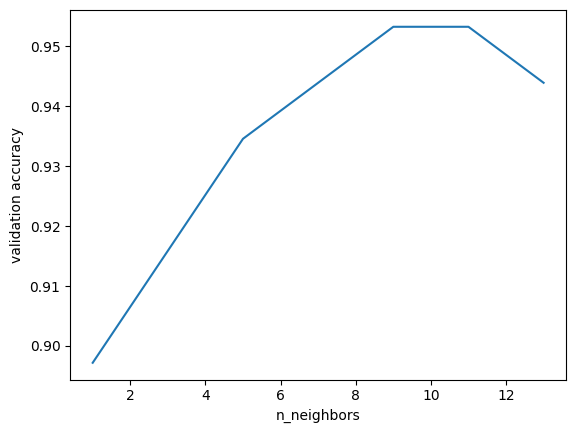

In [8]:
# Plot
plt.plot(neighbors, val_scores)
plt.xlabel("n_neighbors")
plt.ylabel("validation accuracy")